In [94]:
from __future__ import print_function
import nltk
import os

# Setup nltk corpora path
nltk_path = os.sep.join([os.environ['HOME'], 'nltk_data'])
nltk.data.path.insert(0, nltk_path)

In [95]:
import requests
from bs4 import BeautifulSoup
import scipy.io
import matplotlib.pyplot as plt
import matplotlib 
import pandas as pd
import numpy as np
import pickle
from time import sleep
import timeit
import string
import re

#import snips as snp  # my snippets
#snp.prettyplot(matplotlib)  # my aesthetic preferences for plotting
%matplotlib inline

In [96]:
pkl_filename_master = "df_games.pkl"
with open(pkl_filename_master, 'rb') as picklefile: 
    df_games = pickle.load(picklefile)

In [228]:
df_games.head(5)

,id,name,year_released,geek_rating,average_rating,nrate,pic_url,url,index1,min_players,max_players,description,category,attributes
0,13,Catan,1995,7.123,7.26,68026,//cf.geekdo-images.com/images/pic2419375_mt.jpg,https://boardgamegeek.com/boardgame/13/catan,0,3,4,"In Catan (formerly The Settlers of Catan), pla...",[Negotiation],"[Dice Rolling, Hand Management, Modular Board,..."
1,822,Carcassonne,2000,7.335,7.44,67439,//cf.geekdo-images.com/images/pic2337577_mt.jpg,https://boardgamegeek.com/boardgame/822/carcas...,1,2,5,Carcassonne is a tile-placement game in which ...,"[City Building, Medieval, Territory Building]","[Area Control / Area Influence, Tile Placement]"
2,30549,Pandemic,2008,7.585,7.67,62799,//cf.geekdo-images.com/images/pic1534148_mt.jpg,https://boardgamegeek.com/boardgame/30549/pand...,2,2,4,"In Pandemic, several virulent diseases have br...",[Medical],"[Action Point Allowance System, Co-operative P..."
3,36218,Dominion,2008,7.607,7.7,56192,//cf.geekdo-images.com/images/pic394356_mt.jpg,https://boardgamegeek.com/boardgame/36218/domi...,3,2,4,(from the back of the box:)&#10;&#10;&quot;You...,"[Card Game, Medieval]","[Card Drafting, Deck / Pool Building, Hand Man..."
4,68448,7 Wonders,2010,7.749,7.84,52043,//cf.geekdo-images.com/images/pic860217_mt.jpg,https://boardgamegeek.com/boardgame/68448/7-wo...,4,2,7,You are the leader of one of the 7 great citie...,"[Ancient, Card Game, City Building, Civilization]","[Card Drafting, Hand Management, Set Collectio..."


In [316]:
test_df = df_games.copy()

In [317]:
test_df.columns

Index([u'id', u'name', u'year_released', u'geek_rating', u'average_rating',
       u'nrate', u'pic_url', u'url', u'index1', u'min_players', u'max_players',
       u'description', u'category', u'attributes'],
      dtype='object')

In [318]:
test_df = test_df.drop([ u'id', u'year_released', u'geek_rating', u'average_rating', 
       u'nrate', u'pic_url', u'url', u'index1', u'min_players', u'max_players'], axis =1)

In [319]:
test_df["attributes_clean"] = ''

In [320]:
num = len(test_df)
#test =(test_df["attributes"]) 
for row in range(num):
    print(row)
    new_list = []
    test = test_df["attributes"][row] 
    for i in test:
        check = i.encode('ascii','ignore') 
        #print(check)
        new_list.append(check)
    test_df["attributes_clean"][row] = new_list
#test#.encode('ascii','ignore') 

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [321]:
test_df["all_text"] = test_df["attributes_clean"].map(str) + test_df["description"]

In [322]:
test_df["all_text_2"] = test_df["category"].map(str) + test_df["all_text"]

In [323]:
test_df.head(5)

,name,description,category,attributes,attributes_clean,all_text,all_text_2
0,Catan,"In Catan (formerly The Settlers of Catan), pla...",[Negotiation],"[Dice Rolling, Hand Management, Modular Board,...","[Dice Rolling, Hand Management, Modular Board,...","['Dice Rolling', 'Hand Management', 'Modular B...","['Negotiation']['Dice Rolling', 'Hand Manageme..."
1,Carcassonne,Carcassonne is a tile-placement game in which ...,"[City Building, Medieval, Territory Building]","[Area Control / Area Influence, Tile Placement]","[Area Control / Area Influence, Tile Placement]","['Area Control / Area Influence', 'Tile Placem...","['City Building', 'Medieval', 'Territory Build..."
2,Pandemic,"In Pandemic, several virulent diseases have br...",[Medical],"[Action Point Allowance System, Co-operative P...","[Action Point Allowance System, Co-operative P...","['Action Point Allowance System', 'Co-operativ...","['Medical']['Action Point Allowance System', '..."
3,Dominion,(from the back of the box:)&#10;&#10;&quot;You...,"[Card Game, Medieval]","[Card Drafting, Deck / Pool Building, Hand Man...","[Card Drafting, Deck / Pool Building, Hand Man...","['Card Drafting', 'Deck / Pool Building', 'Han...","['Card Game', 'Medieval']['Card Drafting', 'De..."
4,7 Wonders,You are the leader of one of the 7 great citie...,"[Ancient, Card Game, City Building, Civilization]","[Card Drafting, Hand Management, Set Collectio...","[Card Drafting, Hand Management, Set Collectio...","['Card Drafting', 'Hand Management', 'Set Coll...","['Ancient', 'Card Game', 'City Building', 'Civ..."


In [324]:
test_df.iloc[1][5]

u"['Area Control / Area Influence', 'Tile Placement']Carcassonne is a tile-placement game in which the players draw and place a tile with a piece of southern French landscape on it. The tile might feature a city, a road, a cloister, grassland or some combination thereof, and it must be placed adjacent to tiles that have already been played, in such a way that cities are connected to cities, roads to roads, etcetera. Having placed a tile, the player can then decide to place one of his meeples on one of the areas on it: on the city as a knight, on the road as a robber, on a cloister as a monk, or on the grass as a farmer. When that area is complete, that meeple scores points for its owner.&#10;&#10;During a game of Carcassonne, players are faced with decisions like: &quot;Is it really worth putting my last meeple there?&quot; or &quot;Should I use this tile to expand my city, or should I place it near my opponent instead, giving him a hard time to complete his project and score points?&q

In [325]:
import string
import re
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer

In [326]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(str(text)) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(str(token))
    stems = [str(stemmer.stem(t)) for t in filtered_tokens]
    #print(stems)
    return stems


In [404]:
pkl_filename_master = "stop_words.pkl"
with open(pkl_filename_master, 'rb') as picklefile: 
    stop_words= pickle.load(picklefile)

In [405]:

def get_wordnet_pos(treebank_tag):
    """Convert the part-of-speech naming scheme
       from the nltk default to that which is
       recognized by the WordNet lemmatizer"""

    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

    
def preprocess_series_text(data, nltk_path=nltk_path):
    """Perform complete preprocessing on a Pandas series
       including removal of alpha numerical words, normalization,
       punctuation removal, tokenization, stop word removal, 
       and lemmatization."""
    
    # remove alpha numerical words and make lowercase
    alphanum_re = re.compile(r"""\w*\d\w*""")
    alphanum_lambda = lambda x: alphanum_re.sub('', x.strip().lower())

    data = data.map(alphanum_lambda)

    # remove punctuation
    punc_re = re.compile('[%s]' % re.escape(string.punctuation))
    punc_lambda = lambda x: punc_re.sub(' ', x)

    data = data.map(punc_lambda)

    # tokenize words
    data = data.map(word_tokenize)

    # remove stop words
    sw = stop_words
    #sw = stopwords.words('english')
    sw_lambda = lambda x: list(filter(lambda y: y not in sw, x))

    data = data.map(sw_lambda)

    # part of speech tagging--must convert to format used by lemmatizer
    data = data.map(nltk.pos_tag)
    pos_lambda = lambda x: [(y[0], get_wordnet_pos(y[1])) for y in x]
    data = data.map(pos_lambda)

    # lemmatization
    lemmatizer = WordNetLemmatizer()
    lem_lambda = lambda x: [lemmatizer.lemmatize(*y) for y in x]
    data = data.map(lem_lambda)
    
    return data

In [406]:
test_df['tokens'] = preprocess_series_text(test_df['all_text_2'])

In [407]:
test_df.head(5)

,name,description,category,attributes,attributes_clean,all_text,all_text_2,tokens,index1
0,Catan,"In Catan (formerly The Settlers of Catan), pla...",[Negotiation],"[Dice Rolling, Hand Management, Modular Board,...","[Dice Rolling, Hand Management, Modular Board,...","['Dice Rolling', 'Hand Management', 'Modular B...","['Negotiation']['Dice Rolling', 'Hand Manageme...","[negotiation, dice, roll, hand, management, mo...",0
1,Carcassonne,Carcassonne is a tile-placement game in which ...,"[City Building, Medieval, Territory Building]","[Area Control / Area Influence, Tile Placement]","[Area Control / Area Influence, Tile Placement]","['Area Control / Area Influence', 'Tile Placem...","['City Building', 'Medieval', 'Territory Build...","[city, building, medieval, territory, build, a...",1
2,Pandemic,"In Pandemic, several virulent diseases have br...",[Medical],"[Action Point Allowance System, Co-operative P...","[Action Point Allowance System, Co-operative P...","['Action Point Allowance System', 'Co-operativ...","['Medical']['Action Point Allowance System', '...","[medical, action, allowance, system, co, opera...",2
3,Dominion,(from the back of the box:)&#10;&#10;&quot;You...,"[Card Game, Medieval]","[Card Drafting, Deck / Pool Building, Hand Man...","[Card Drafting, Deck / Pool Building, Hand Man...","['Card Drafting', 'Deck / Pool Building', 'Han...","['Card Game', 'Medieval']['Card Drafting', 'De...","[medieval, draft, deck, pool, build, hand, man...",3
4,7 Wonders,You are the leader of one of the 7 great citie...,"[Ancient, Card Game, City Building, Civilization]","[Card Drafting, Hand Management, Set Collectio...","[Card Drafting, Hand Management, Set Collectio...","['Card Drafting', 'Hand Management', 'Set Coll...","['Ancient', 'Card Game', 'City Building', 'Civ...","[ancient, city, building, civilization, draft,...",4


In [408]:
test_df.iloc[1]['tokens']

[u'city',
 u'building',
 u'medieval',
 u'territory',
 u'build',
 u'area',
 u'control',
 u'area',
 u'influence',
 u'tile',
 u'placement',
 u'tile',
 u'placement',
 u'draw',
 u'place',
 u'tile',
 u'piece',
 u'southern',
 u'french',
 u'landscape',
 u'tile',
 u'might',
 u'feature',
 u'city',
 u'road',
 u'cloister',
 u'grassland',
 u'combination',
 u'thereof',
 u'place',
 u'adjacent',
 u'tile',
 u'already',
 u'play',
 u'way',
 u'city',
 u'connect',
 u'city',
 u'road',
 u'road',
 u'etcetera',
 u'place',
 u'tile',
 u'decide',
 u'place',
 u'meeples',
 u'area',
 u'city',
 u'knight',
 u'road',
 u'robber',
 u'cloister',
 u'monk',
 u'grass',
 u'farmer',
 u'area',
 u'complete',
 u'meeple',
 u'owner',
 u'face',
 u'decision',
 u'like',
 u'really',
 u'worth',
 u'put',
 u'last',
 u'meeple',
 u'tile',
 u'expand',
 u'city',
 u'place',
 u'near',
 u'opponent',
 u'instead',
 u'give',
 u'hard',
 u'complete',
 u'project',
 u'since',
 u'place',
 u'tile',
 u'option',
 u'place',
 u'meeple',
 u'turn',
 u'proceed'

In [409]:
sushi_tokens = list(test_df['tokens'][test_df['name'] == "Sushi Go!"])
sushi_tokens

[[u'draft',
  u'hand',
  u'management',
  u'set',
  u'collection',
  u'simultaneous',
  u'action',
  u'selection',
  u'super',
  u'fast',
  u'go',
  u'eat',
  u'restaurant',
  u'try',
  u'grab',
  u'best',
  u'combination',
  u'dish',
  u'whiz',
  u'collect',
  u'roll',
  u'make',
  u'full',
  u'set',
  u'sashimi',
  u'dip',
  u'favorite',
  u'nigiri',
  u'wasabi',
  u'triple',
  u'value',
  u'eat',
  u'finish',
  u'meal',
  u'pudding',
  u'get',
  u'careful',
  u'allow',
  u'friend',
  u'might',
  u'need',
  u'beat',
  u'go',
  u'take',
  u'draft',
  u'mechanism',
  u'fairy',
  u'tale',
  u'wonder',
  u'distills',
  u'twenty',
  u'minute',
  u'anyone',
  u'dynamic',
  u'draft',
  u'pas',
  u'bring',
  u'fore',
  u'keep',
  u'minimum',
  u'see',
  u'hand',
  u'quickly',
  u'assess',
  u'round',
  u'decide',
  u'type',
  u'go',
  u'need',
  u'weigh',
  u'keep',
  u'pas',
  u'score',
  u'combination',
  u'allow',
  u'clever',
  u'play',
  u'nasty',
  u'block',
  u'round',
  u'round',
  u

In [410]:
test_df.head(5)

,name,description,category,attributes,attributes_clean,all_text,all_text_2,tokens,index1
0,Catan,"In Catan (formerly The Settlers of Catan), pla...",[Negotiation],"[Dice Rolling, Hand Management, Modular Board,...","[Dice Rolling, Hand Management, Modular Board,...","['Dice Rolling', 'Hand Management', 'Modular B...","['Negotiation']['Dice Rolling', 'Hand Manageme...","[negotiation, dice, roll, hand, management, mo...",0
1,Carcassonne,Carcassonne is a tile-placement game in which ...,"[City Building, Medieval, Territory Building]","[Area Control / Area Influence, Tile Placement]","[Area Control / Area Influence, Tile Placement]","['Area Control / Area Influence', 'Tile Placem...","['City Building', 'Medieval', 'Territory Build...","[city, building, medieval, territory, build, a...",1
2,Pandemic,"In Pandemic, several virulent diseases have br...",[Medical],"[Action Point Allowance System, Co-operative P...","[Action Point Allowance System, Co-operative P...","['Action Point Allowance System', 'Co-operativ...","['Medical']['Action Point Allowance System', '...","[medical, action, allowance, system, co, opera...",2
3,Dominion,(from the back of the box:)&#10;&#10;&quot;You...,"[Card Game, Medieval]","[Card Drafting, Deck / Pool Building, Hand Man...","[Card Drafting, Deck / Pool Building, Hand Man...","['Card Drafting', 'Deck / Pool Building', 'Han...","['Card Game', 'Medieval']['Card Drafting', 'De...","[medieval, draft, deck, pool, build, hand, man...",3
4,7 Wonders,You are the leader of one of the 7 great citie...,"[Ancient, Card Game, City Building, Civilization]","[Card Drafting, Hand Management, Set Collectio...","[Card Drafting, Hand Management, Set Collectio...","['Card Drafting', 'Hand Management', 'Set Coll...","['Ancient', 'Card Game', 'City Building', 'Civ...","[ancient, city, building, civilization, draft,...",4


In [411]:
from gensim import corpora

dictionary = corpora.Dictionary(test_df.tokens)

# This command can be used to filter the dictionary results
dictionary.filter_extremes(no_below=10, no_above=0.5)

In [412]:
type(dictionary)

gensim.corpora.dictionary.Dictionary

In [413]:
corpus = [dictionary.doc2bow(text) for text in test_df.tokens]


In [414]:
type(corpus)

list

In [415]:
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))

Number of unique tokens: 2164
Number of documents: 1600


In [416]:
from gensim.models import LdaModel

# Set training parameters.
num_topics = 11
chunksize = 200
passes = 10
iterations = 100
eval_every = None  # Model perplexity takes quite a lot of time.

# Make a index to word dictionary.
temp = dictionary[0]  # This is to force Gensim to load the dictionary.
id2word = dictionary.id2token

model = LdaModel(corpus=corpus, id2word=id2word, 
                       chunksize=chunksize,
                       alpha='auto', 
                       eta='auto',
                       iterations=iterations, 
                       num_topics=num_topics,
                       passes=passes, 
                       eval_every=eval_every)

In [417]:
model.show_topics()

[(6,
  u'0.084*"animal" + 0.044*"trick" + 0.029*"suit" + 0.027*"answer" + 0.020*"round" + 0.019*"bet" + 0.019*"party" + 0.018*"hand" + 0.017*"category" + 0.015*"wager"'),
 (10,
  u'0.021*"hand" + 0.020*"base" + 0.018*"deck" + 0.013*"king" + 0.013*"set" + 0.012*"management" + 0.012*"ring" + 0.011*"role" + 0.010*"box" + 0.010*"release"'),
 (2,
  u'0.037*"ship" + 0.019*"pirate" + 0.015*"planet" + 0.015*"tower" + 0.015*"space" + 0.015*"treasure" + 0.014*"exploration" + 0.012*"system" + 0.011*"island" + 0.011*"rail"'),
 (7,
  u'0.026*"hero" + 0.022*"monster" + 0.021*"fantasy" + 0.021*"deck" + 0.021*"adventure" + 0.019*"power" + 0.018*"fight" + 0.015*"character" + 0.012*"variable" + 0.012*"dragon"'),
 (5,
  u'0.026*"build" + 0.022*"civilization" + 0.015*"age" + 0.013*"empire" + 0.012*"world" + 0.011*"great" + 0.011*"city" + 0.010*"building" + 0.010*"kingdom" + 0.010*"resource"'),
 (1,
  u'0.027*"hand" + 0.021*"round" + 0.017*"deck" + 0.017*"value" + 0.016*"set" + 0.014*"draw" + 0.011*"place"

In [418]:
from pprint import pprint

top_topics = model.top_topics(corpus, num_words=10)
pprint(top_topics)

[([(0.017203464616546808, u'war'),
   (0.014957880449829404, u'power'),
   (0.01292235730620653, u'area'),
   (0.012805138891349961, u'battle'),
   (0.012787212749108035, u'control'),
   (0.010150750666257109, u'movement'),
   (0.0098437241087989662, u'world'),
   (0.0079321369694699481, u'base'),
   (0.0074558606008055684, u'system'),
   (0.0072693964980874654, u'dice')],
  -44.413699714462787),
 ([(0.026192626764630446, u'hero'),
   (0.021624407947948933, u'monster'),
   (0.021431621092030326, u'fantasy'),
   (0.020718266706880619, u'deck'),
   (0.020682988001818559, u'adventure'),
   (0.018712576060237972, u'power'),
   (0.017763152977592758, u'fight'),
   (0.014719087951318639, u'character'),
   (0.012159973650438288, u'variable'),
   (0.01204115080248282, u'dragon')],
  -46.775295376233132),
 ([(0.027999139254068273, u'city'),
   (0.025729461211244649, u'build'),
   (0.025049820935036517, u'building'),
   (0.022352246919581459, u'area'),
   (0.019580279741216088, u'action'),
   (0

In [419]:
import pyLDAvis, pyLDAvis.gensim
from IPython.display import display

# Setup to run in Jupyter notebook
pyLDAvis.enable_notebook()

# Create the visualization
vis = pyLDAvis.gensim.prepare(model, corpus, dictionary)

# Export as a standalone HTML web page
pyLDAvis.save_html(vis, 'lda.html')

# Let's view it!
display(vis)

PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
3      18.820123        1       1 -0.139462 -0.040988
9      14.146161        1       2  0.048543  0.207966
1      11.142322        1       3  0.167972 -0.008748
4      10.783472        1       4  0.046737 -0.082078
7       9.548408        1       5 -0.191336 -0.114312
8       9.161095        1       6  0.005790 -0.011305
0       8.353044        1       7  0.189174  0.046785
5       6.847007        1       8 -0.089869  0.171074
2       5.524167        1       9 -0.157650  0.072276
10      3.903919        1      10 -0.010502 -0.120744
6       1.770282        1      11  0.130603 -0.119925, topic_info=     Category         Freq          Term        Total  loglift  logprob
term                                                                   
674   Default  1203.000000          tile  1203.000000  30.0000  30.0000
871   Default  1120.000000          dice  1120.000000  29.0000  29.0000
2132  Default   486.000000         piece   486.000000  28.0000  28.0000
538   Default   854.000000          roll   854.000000  27.0000  27.0000
1760  Default   259.000000        animal   259.000000  26.0000  26.0000
527   Default   420.000000          ship   420.000000  25.0000  25.0000
598   Default   669.000000         round   669.000000  24.0000  24.0000
137   Default   797.000000          deck   797.000000  23.0000  23.0000
318   Default   376.000000          hero   376.000000  22.0000  22.0000
913   Default   414.000000         color   414.000000  21.0000  21.0000
200   Default  1122.000000          hand  1122.000000  20.0000  20.0000
1353  Default  1081.000000         build  1081.000000  19.0000  19.0000
787   Default   813.000000          city   813.000000  18.0000  18.0000
505   Default   486.000000           war   486.000000  17.0000  17.0000
773   Default   882.000000         place   882.000000  16.0000  16.0000
1083  Default   731.000000      building   731.000000  15.0000  15.0000
1043  Default   913.000000          area   913.000000  14.0000  14.0000
756   Default   310.000000       monster   310.000000  13.0000  13.0000
1777  Default   756.000000          move   756.000000  12.0000  12.0000
211   Default   368.000000       fantasy   368.000000  11.0000  11.0000
1222  Default   345.000000     adventure   345.000000  10.0000  10.0000
501   Default   473.000000         fight   473.000000   9.0000   9.0000
369   Default   332.000000        worker   332.000000   8.0000   8.0000
431   Default   460.000000     character   460.000000   7.0000   7.0000
1561  Default   230.000000  civilization   230.000000   6.0000   6.0000
748   Default   462.000000         space   462.000000   5.0000   5.0000
1286  Default   813.000000          base   813.000000   4.0000   4.0000
1166  Default  1210.000000        action  1210.000000   3.0000   3.0000
569   Default   420.000000        battle   420.000000   2.0000   2.0000
1356  Default   510.000000          play   510.000000   1.0000   1.0000
...       ...          ...           ...          ...      ...      ...
700   Topic11    11.192383          talk    14.146445   3.7998  -5.4695
2146  Topic11    44.710120      category    57.855909   3.7763  -4.0845
1587  Topic11    39.395946      question    60.414501   3.6065  -4.2111
1110  Topic11    16.543778         sound    26.481523   3.5636  -5.0787
404   Topic11    11.020577        fairly    18.355442   3.5239  -5.4850
562   Topic11     4.590128         dance     7.850146   3.4974  -6.3608
1716  Topic11    12.444782       awesome    21.865782   3.4704  -5.3634
1309  Topic11    15.159773         blank    27.844362   3.4260  -5.1661
2099  Topic11     4.728474       friends    10.602212   3.2266  -6.3311
196   Topic11    36.042568      standard    96.232565   3.0520  -4.3000
2051  Topic11     7.084816      sequence    19.114154   3.0416  -5.9268
1268  Topic11     6.156952        expect    16.729511   3.0344  -6.0671
69    Topic11  

In [420]:
t=2
word_list = model.show_topic(t, 20)
print(word_list)

[(u'ship', 0.037334204644052835), (u'pirate', 0.019056009320840072), (u'planet', 0.015350764658742931), (u'tower', 0.014896538062401973), (u'space', 0.01487349144351924), (u'treasure', 0.014567512280610345), (u'exploration', 0.013750671045866057), (u'system', 0.012092004462185281), (u'island', 0.011053311594022465), (u'rail', 0.010900239267814226), (u'explore', 0.010416692874890178), (u'find', 0.0091213551000855347), (u'explorer', 0.0089011826151871552), (u'crew', 0.0084698269950186002), (u'movement', 0.0080819822430562606), (u'ancient', 0.0078222335356077869), (u'investigator', 0.0072560943432502566), (u'pick', 0.0070774705141026144), (u'deliver', 0.0066915925791148044), (u'colony', 0.0066487064423274523)]


0


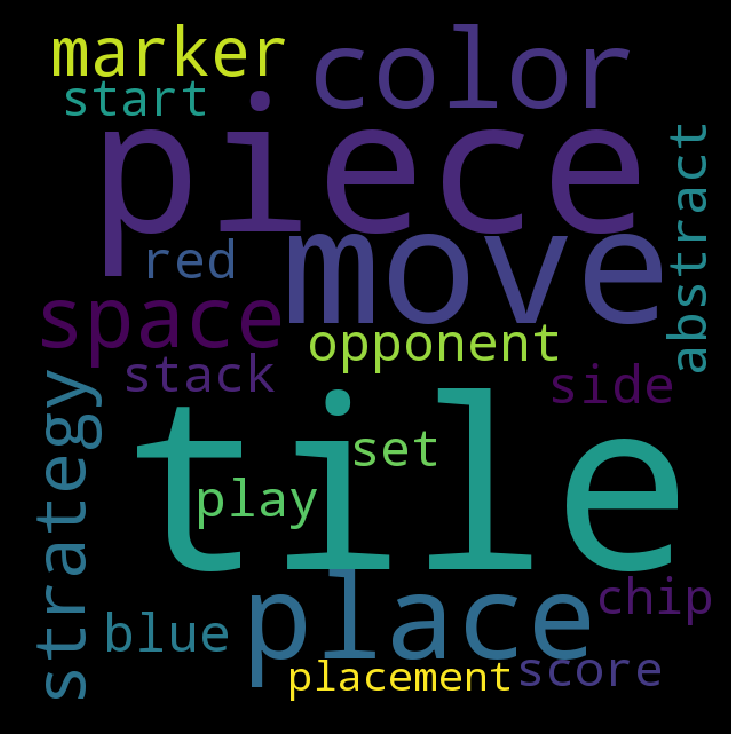

1


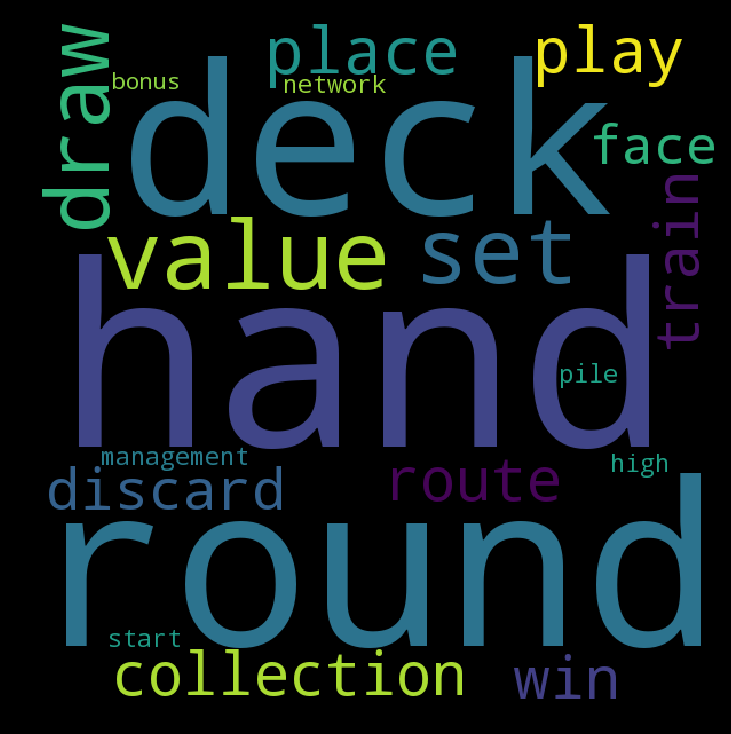

2


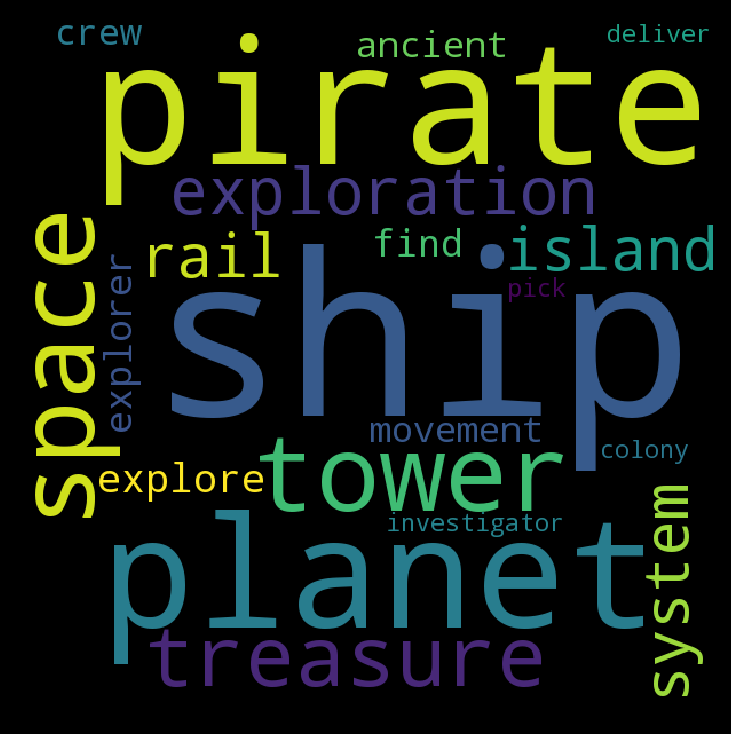

3


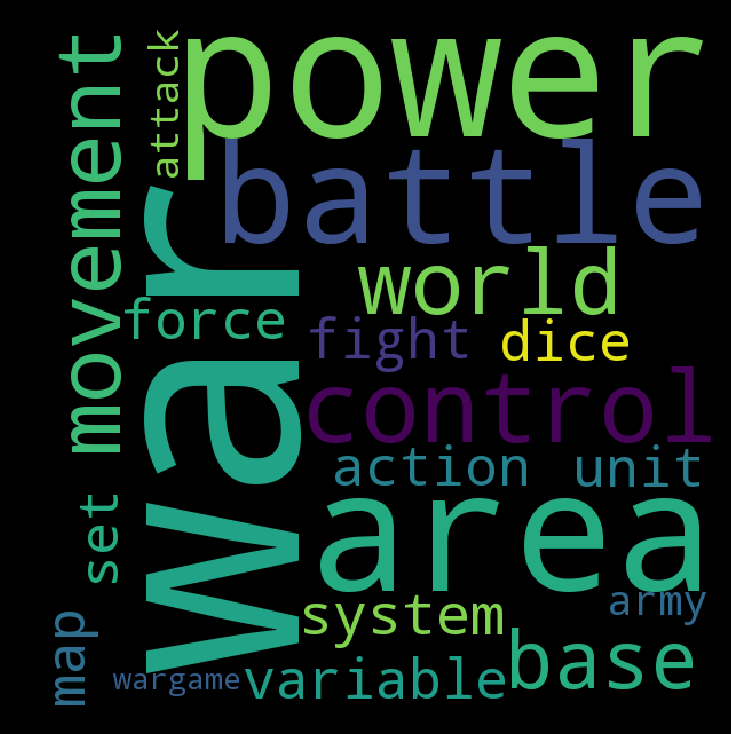

4


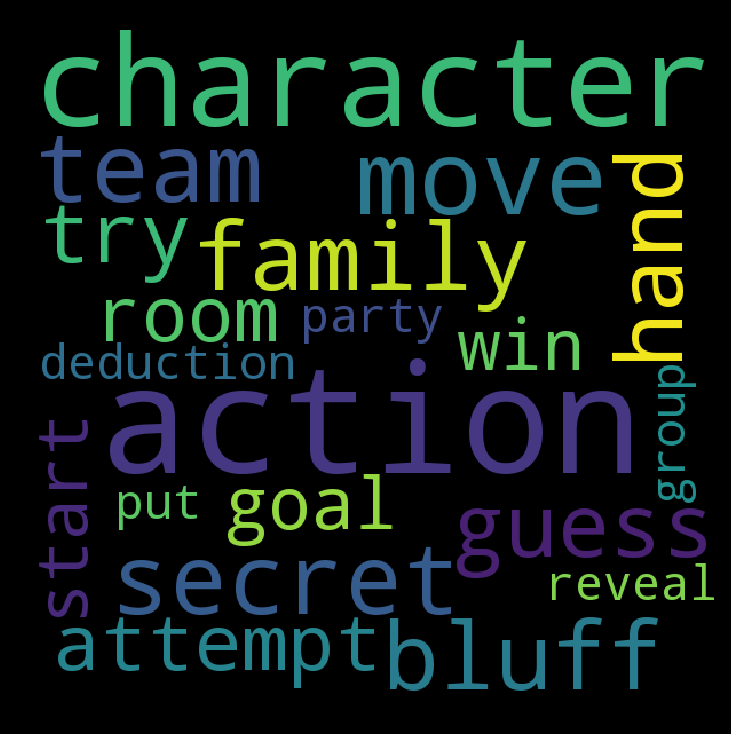

5


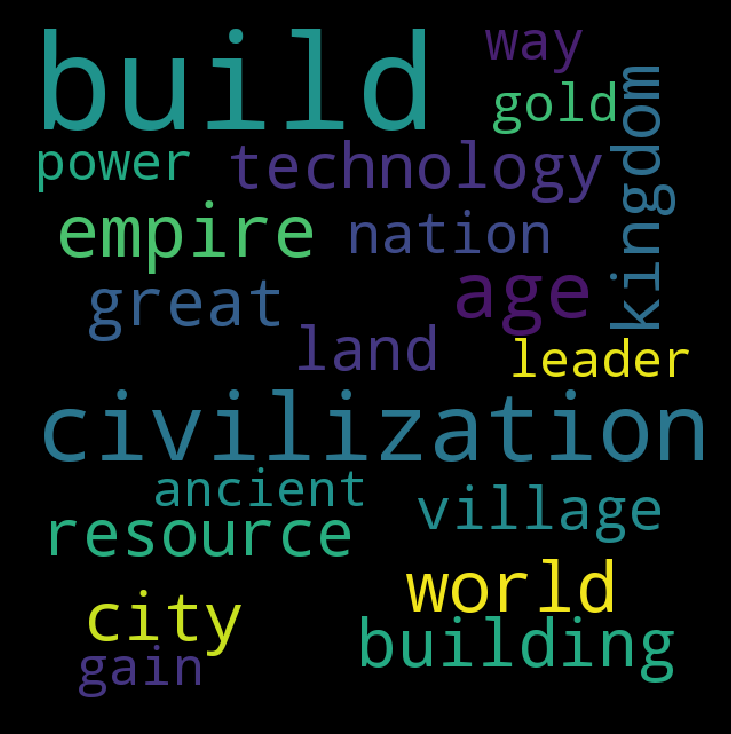

6


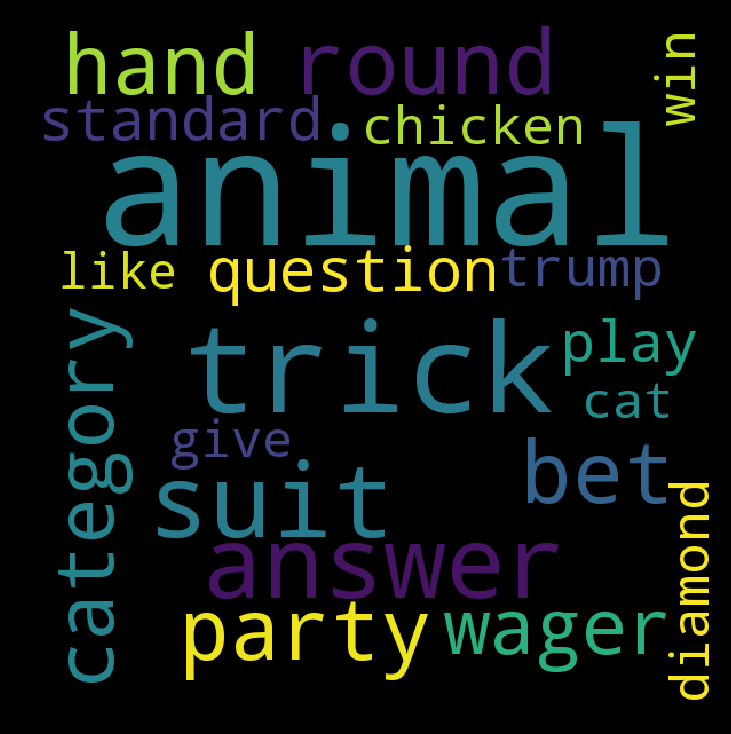

7


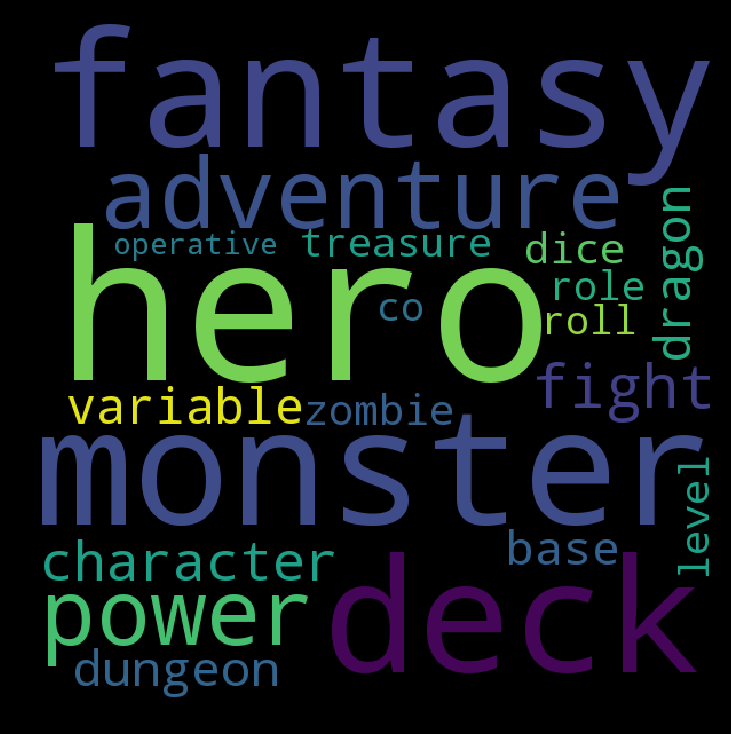

8


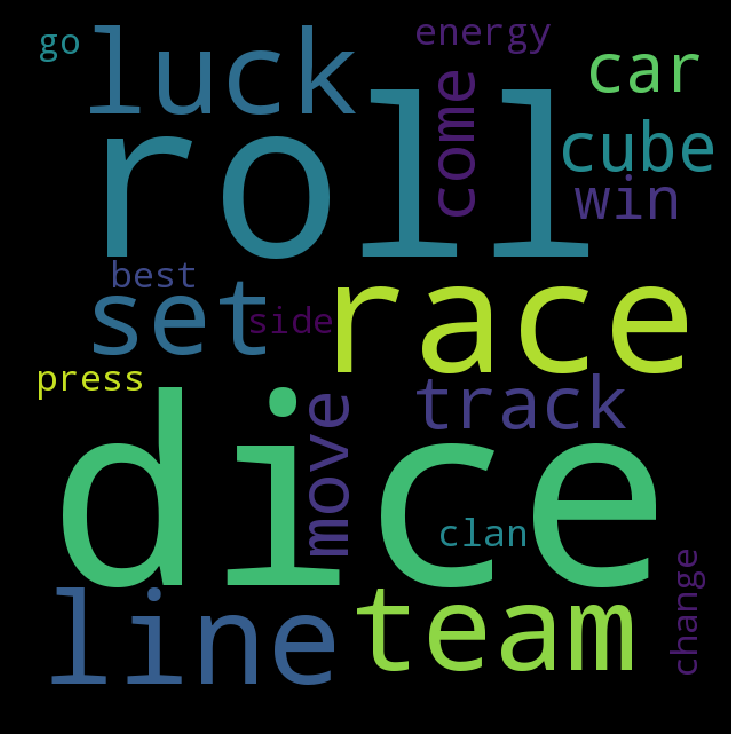

9


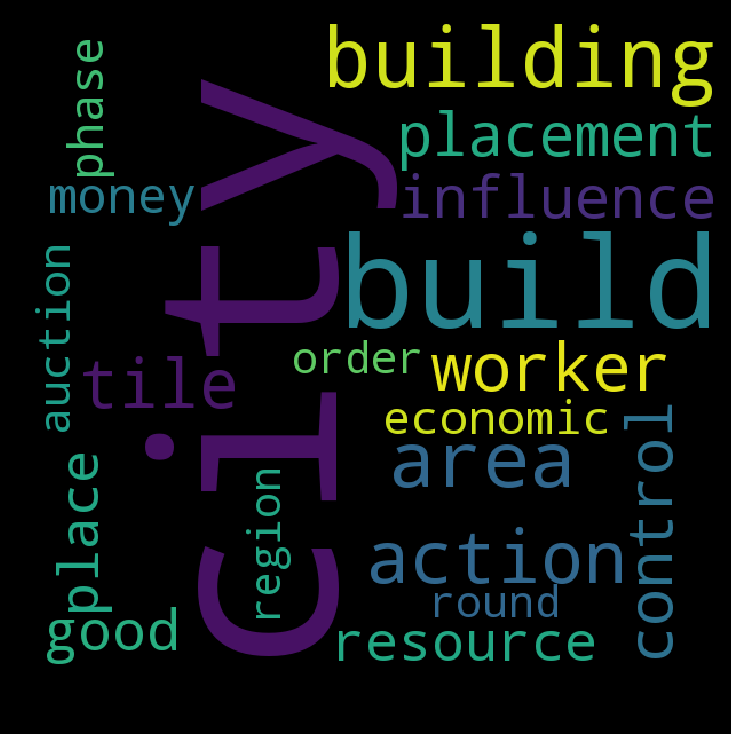

10


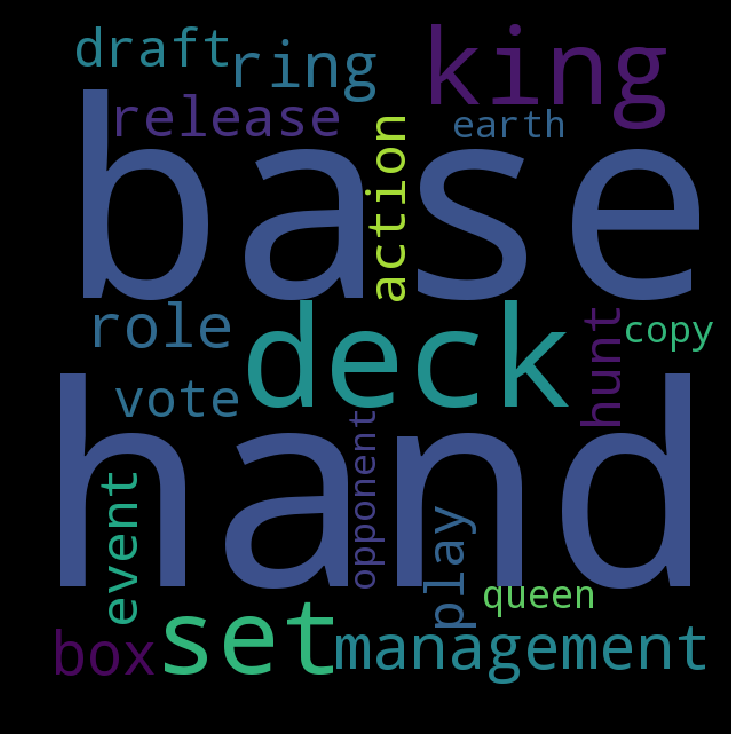

In [443]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
for t in range(model.num_topics):
    print(t)
    wordcloud = WordCloud(width = 600,height = 600, background_color = "black").fit_words(dict(model.show_topic(t, 20)))
    
    
    fig = plt.figure()
    # Instead of set_figwidth(30)
    fig.set_size_inches(20, fig.get_figheight(), forward=True)
    plt.figure( figsize=(20,10), facecolor='k')
    plt.title("Topic #" + str(t))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title("Topic #" + str(t))
    plt.tight_layout(pad=0)
    plt.show()
    
    #plt.figure()
    #plt.imshow(WordCloud().fit_words(dict(model.show_topic(t, 30))))
    #plt.axis("off")
    #plt.title("Topic #" + str(t))
    #plt.show()

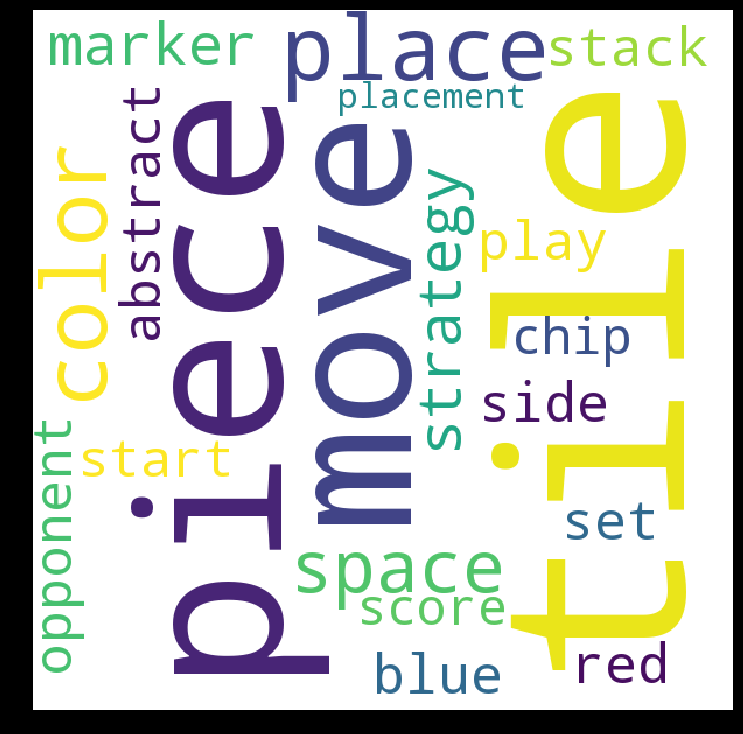

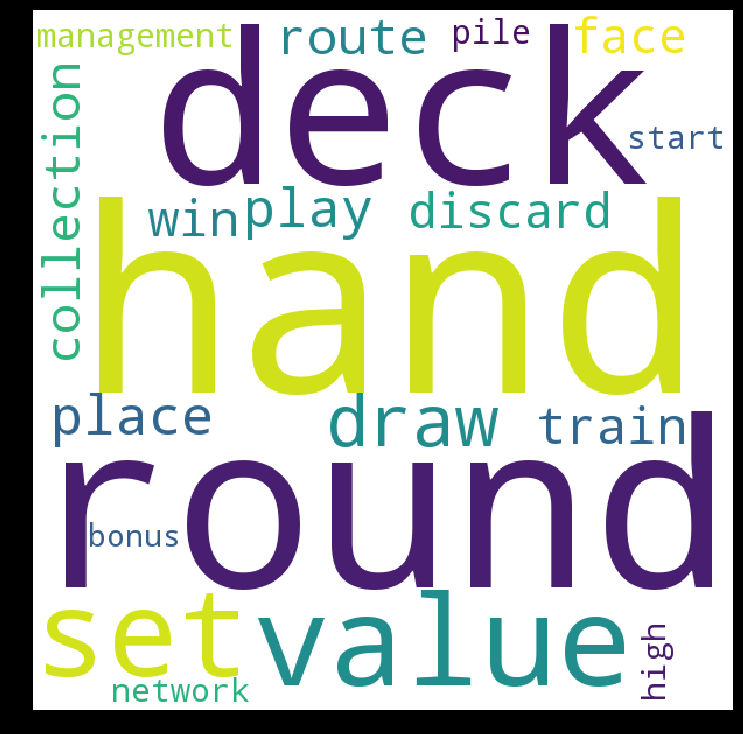

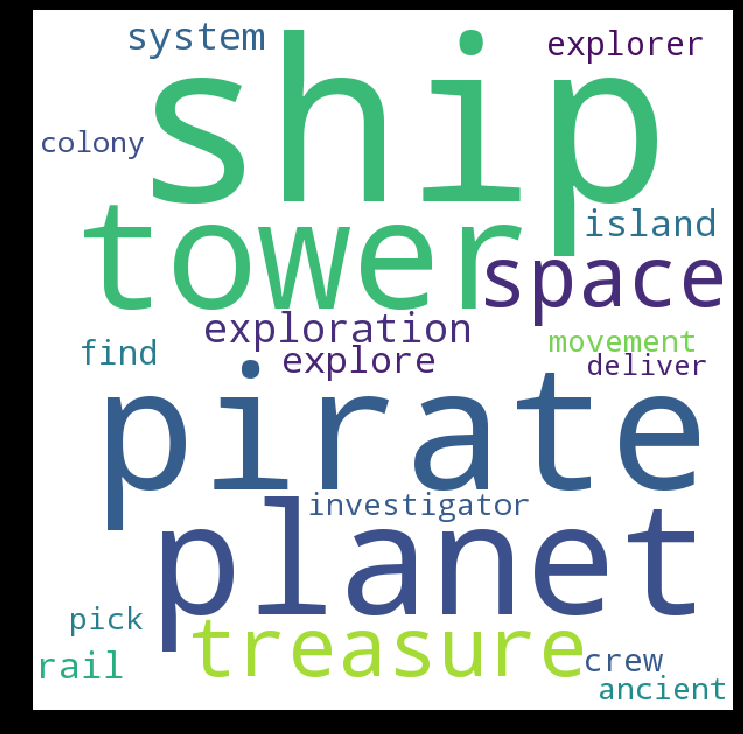

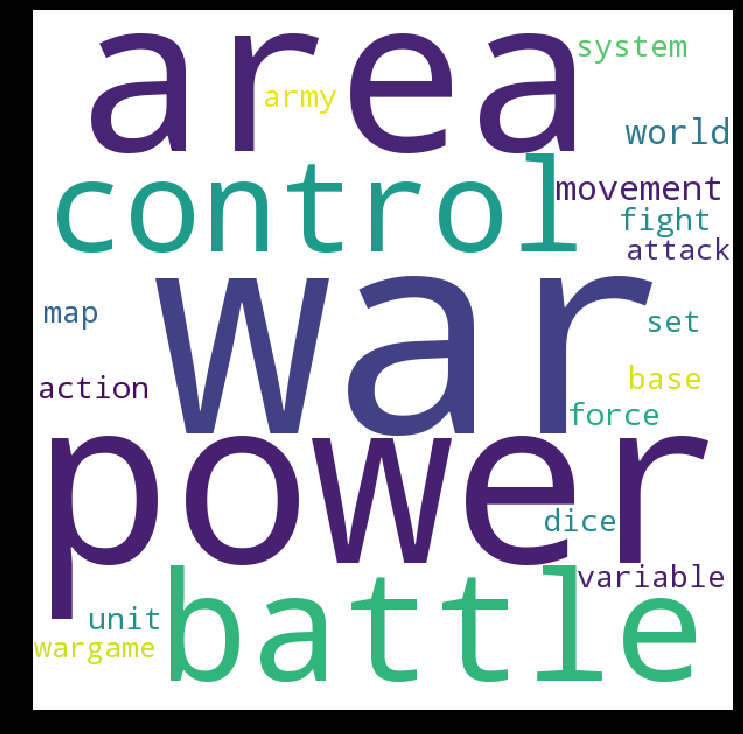

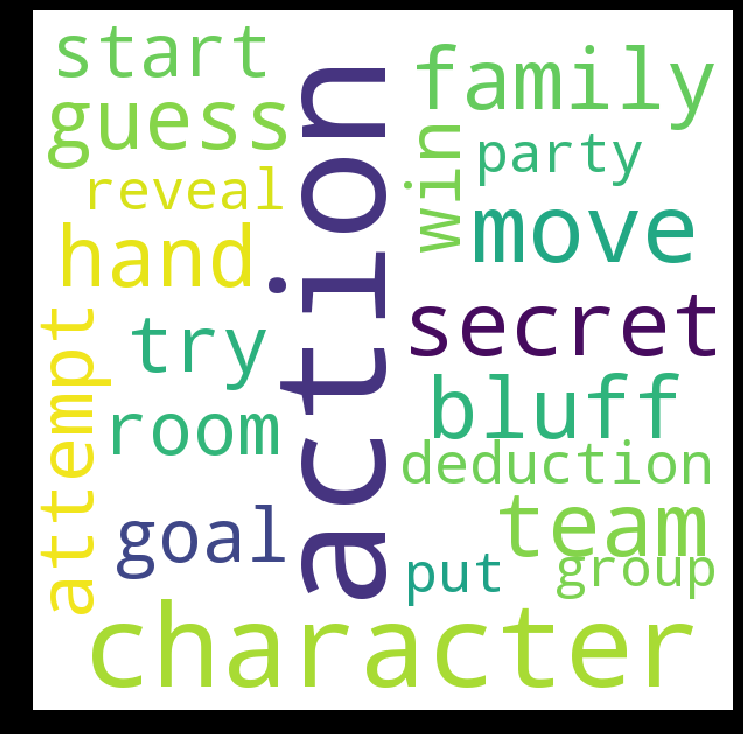

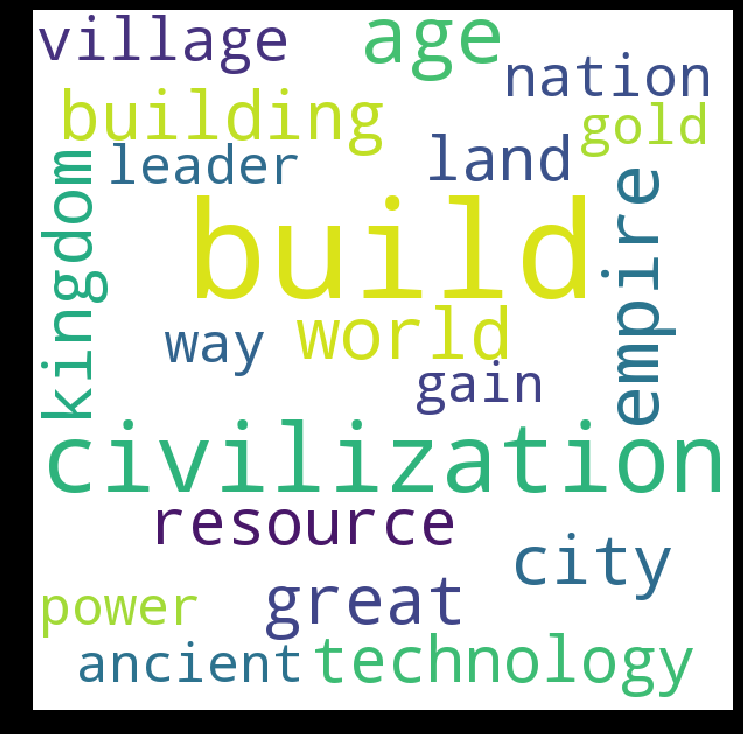

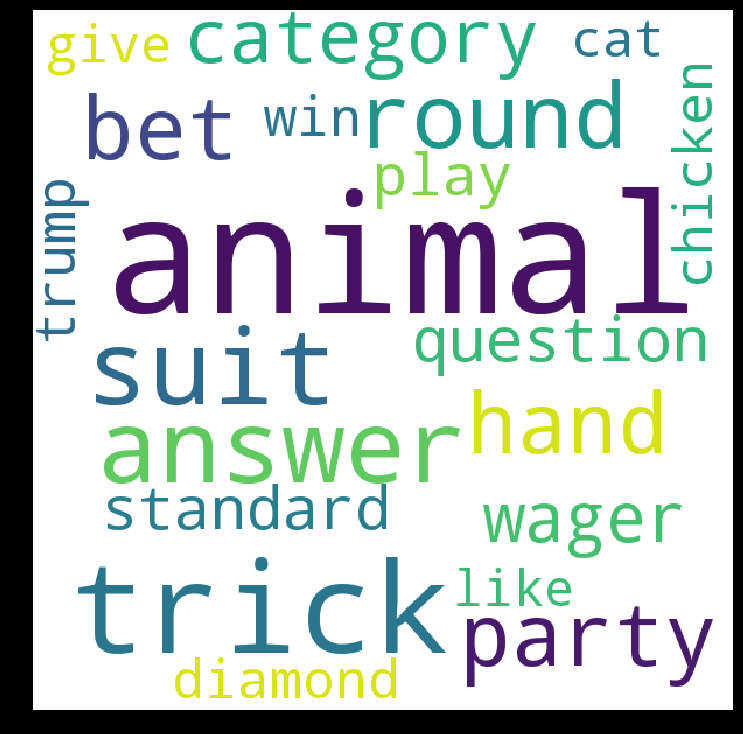

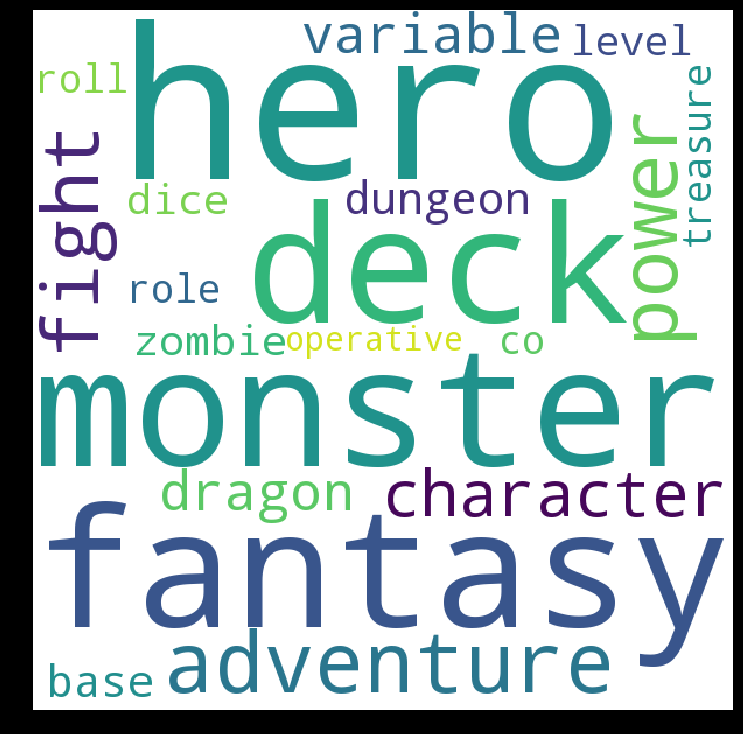

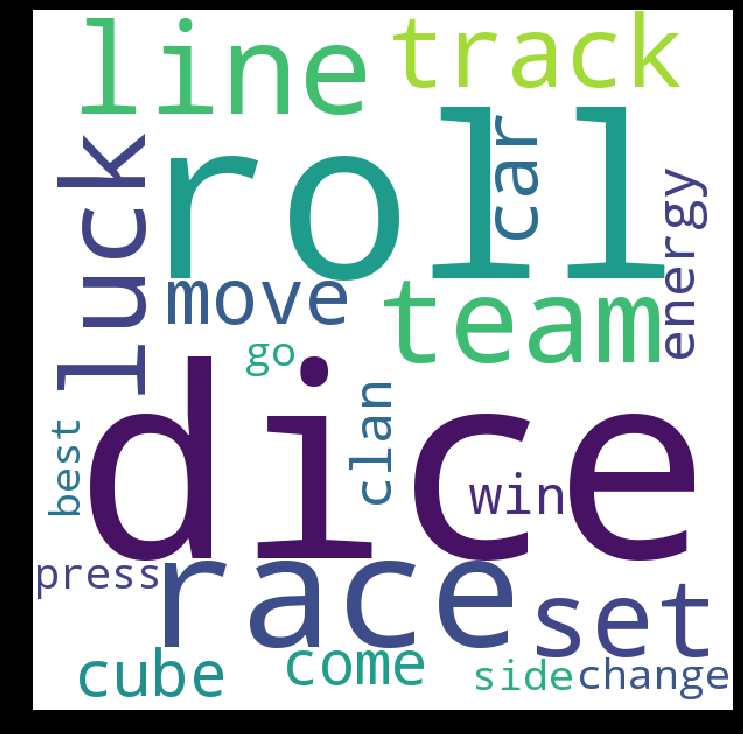

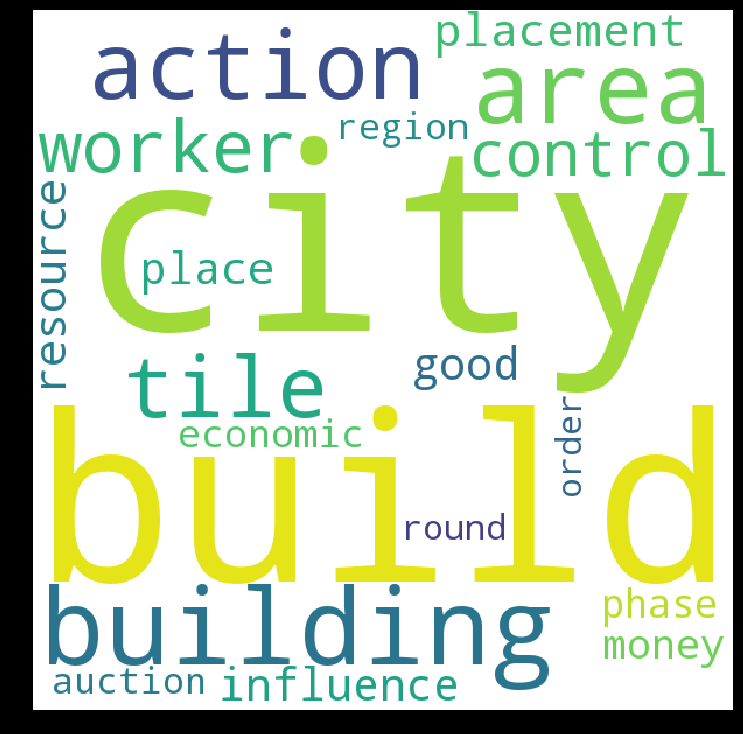

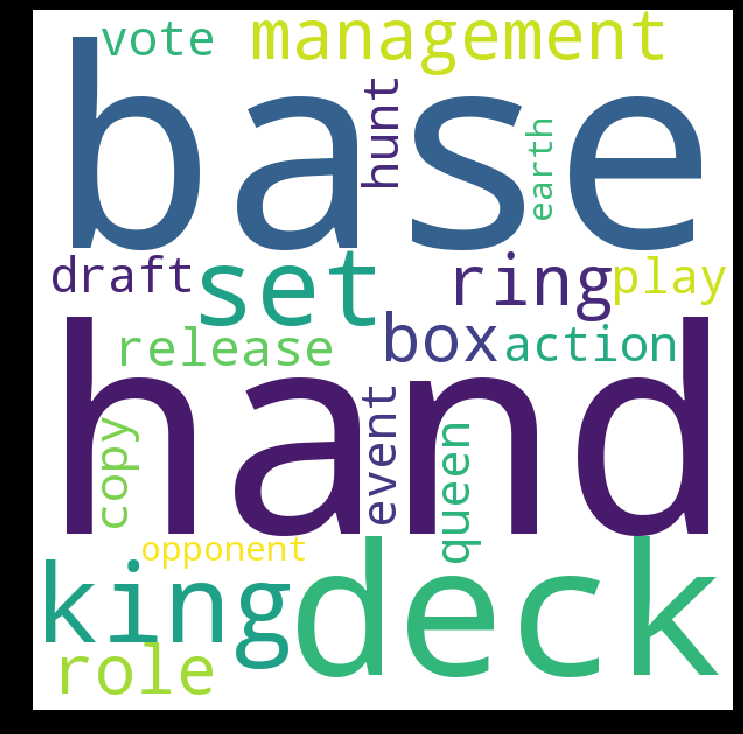

In [439]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
for t in range(model.num_topics):
    wordcloud = WordCloud(width = 600,height = 600, background_color = "white").fit_words(dict(model.show_topic(t, 20)))
    
    
    fig = plt.figure()
    # Instead of set_figwidth(30)
    fig.set_size_inches(20, fig.get_figheight(), forward=True)
    plt.figure( figsize=(20,10), facecolor='k')
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

Try to get the cluster of each game:

In [423]:
def get_doc_topic(corpus, model): 
    doc_topic = list() 
    for doc in corpus: 
        doc_topic.append(model.__getitem__(doc, eps=0)) 
    #print(doc_topic)
    return doc_topic 

In [424]:
group_prediction = get_doc_topic(corpus, model)

In [425]:
def get_topic_to_wordids(model): 
        p = list() 
        for topicid in range(model.num_topics): 
            topic = model.state.get_lambda()[topicid] 
            topic = topic / topic.sum() # normalize to probability dist 
            p.append(topic) 
        return p 

In [426]:
get_topic_to_wordids(model)

[array([  8.01545688e-06,   9.22638497e-06,   4.96134413e-03, ...,
          2.80632825e-06,   2.66325950e-06,   3.00663644e-06]),
 array([  6.21767411e-06,   7.17148504e-06,   2.39963354e-06, ...,
          2.17721523e-06,   2.06621920e-06,   2.33261909e-06]),
 array([  1.22191777e-05,   1.40743338e-05,   4.71636832e-06, ...,
          4.27921545e-06,   4.06105790e-06,   4.58465452e-06]),
 array([  4.30566635e-04,   6.82808466e-04,   1.33023926e-06, ...,
          1.20694143e-06,   1.14541067e-06,   1.29308972e-06]),
 array([  6.38691035e-06,   7.36331026e-06,   2.46461489e-06, ...,
          2.23617357e-06,   2.12217179e-06,   2.39578571e-06]),
 array([  1.00733916e-05,   3.63224496e-04,   3.88703935e-06, ...,
          3.52675572e-06,   3.34695912e-06,   3.77865306e-06]),
 array([  3.37410764e-05,   3.88631447e-05,   1.30256879e-05, ...,
          1.18183571e-05,   1.12158486e-05,   1.26619202e-05]),
 array([  7.09728477e-06,   9.38870626e-06,   2.73870811e-06, ...,
          2.4848

In [427]:
group_prediction[1][1][1]

0.0034818356780918877

In [428]:
keep = [[x[1] for x in document] for document in group_prediction]
keep

[[0.11385082315836137,
  0.0016187199034855475,
  0.00085957467362235689,
  0.089397656443482965,
  0.098067321945387212,
  0.07299227441161335,
  0.00030020163365125635,
  0.00091022014184091813,
  0.1287314980117665,
  0.49263430877624409,
  0.00063740090054461608],
 [0.47693857398099154,
  0.0034818356780918877,
  0.0018309177392701035,
  0.006888603800625925,
  0.0055039234472569276,
  0.0022434165593446815,
  0.00064055811044942462,
  0.0019468295178766664,
  0.0042750278922093696,
  0.49489036028514533,
  0.0013599529887380287],
 [0.0021771972386946089,
  0.21061848374383849,
  0.0015640505874640782,
  0.17880820974567921,
  0.005117426343675055,
  0.25167186368846656,
  0.00054500567621529328,
  0.3153879859298987,
  0.029664019442377072,
  0.0032879013084427772,
  0.0011578562952482508],
 [0.0025290323883312049,
  0.0032987395788555492,
  0.0017057514819118313,
  0.0063018365445026347,
  0.0043856002002579638,
  0.2333017512531127,
  0.00059211279031900241,
  0.0586768796264628

In [429]:
columns = range(num_topics)
column_list = ['group '+ str(num) for num in columns]
#column_list
df_group = pd.DataFrame([[x[1] for x in document] for document in group_prediction],columns=column_list )
df_group

,group 0,group 1,group 2,group 3,group 4,group 5,group 6,group 7,group 8,group 9,group 10
0,0.113851,0.001619,0.000860,0.089398,0.098067,0.072992,0.000300,0.000910,0.128731,0.492634,0.000637
1,0.476939,0.003482,0.001831,0.006889,0.005504,0.002243,0.000641,0.001947,0.004275,0.494890,0.001360
2,0.002177,0.210618,0.001564,0.178808,0.005117,0.251672,0.000545,0.315388,0.029664,0.003288,0.001158
3,0.002529,0.003299,0.001706,0.006302,0.004386,0.233302,0.000592,0.058677,0.223054,0.192353,0.273801
4,0.030852,0.211283,0.001345,0.029468,0.036022,0.446407,0.000470,0.001424,0.003097,0.002910,0.236722
5,0.002123,0.373441,0.001502,0.005650,0.004166,0.001844,0.000524,0.001587,0.500490,0.107560,0.001113
6,0.168900,0.231660,0.001314,0.074488,0.072634,0.135580,0.019612,0.001397,0.015528,0.277913,0.000974
7,0.013327,0.101149,0.001130,0.003847,0.057383,0.001384,0.000393,0.001197,0.002519,0.690921,0.126748
8,0.105753,0.002637,0.001382,0.265251,0.137676,0.039095,0.000483,0.127249,0.222198,0.097251,0.001025
9,0.002082,0.556017,0.001483,0.059766,0.003701,0.136476,0.054099,0.001581,0.004871,0.178821,0.001102


In [430]:
df_group['max_group'] = df_group.idxmax(axis =1)

In [431]:
df_group['index1'] = df_group.index

In [432]:
test_df['index1'] = test_df.index

add the game names to the dataframe:

In [433]:
df_groups_names = pd.merge(test_df, df_group, on='index1')

In [434]:
df_groups_names.head(5)

,name,description,category,attributes,attributes_clean,all_text,all_text_2,tokens,index1,group 0,...,group 2,group 3,group 4,group 5,group 6,group 7,group 8,group 9,group 10,max_group
0,Catan,"In Catan (formerly The Settlers of Catan), pla...",[Negotiation],"[Dice Rolling, Hand Management, Modular Board,...","[Dice Rolling, Hand Management, Modular Board,...","['Dice Rolling', 'Hand Management', 'Modular B...","['Negotiation']['Dice Rolling', 'Hand Manageme...","[negotiation, dice, roll, hand, management, mo...",0,0.113851,...,0.000860,0.089398,0.098067,0.072992,0.000300,0.000910,0.128731,0.492634,0.000637,group 9
1,Carcassonne,Carcassonne is a tile-placement game in which ...,"[City Building, Medieval, Territory Building]","[Area Control / Area Influence, Tile Placement]","[Area Control / Area Influence, Tile Placement]","['Area Control / Area Influence', 'Tile Placem...","['City Building', 'Medieval', 'Territory Build...","[city, building, medieval, territory, build, a...",1,0.476939,...,0.001831,0.006889,0.005504,0.002243,0.000641,0.001947,0.004275,0.494890,0.001360,group 9
2,Pandemic,"In Pandemic, several virulent diseases have br...",[Medical],"[Action Point Allowance System, Co-operative P...","[Action Point Allowance System, Co-operative P...","['Action Point Allowance System', 'Co-operativ...","['Medical']['Action Point Allowance System', '...","[medical, action, allowance, system, co, opera...",2,0.002177,...,0.001564,0.178808,0.005117,0.251672,0.000545,0.315388,0.029664,0.003288,0.001158,group 7
3,Dominion,(from the back of the box:)&#10;&#10;&quot;You...,"[Card Game, Medieval]","[Card Drafting, Deck / Pool Building, Hand Man...","[Card Drafting, Deck / Pool Building, Hand Man...","['Card Drafting', 'Deck / Pool Building', 'Han...","['Card Game', 'Medieval']['Card Drafting', 'De...","[medieval, draft, deck, pool, build, hand, man...",3,0.002529,...,0.001706,0.006302,0.004386,0.233302,0.000592,0.058677,0.223054,0.192353,0.273801,group 10
4,7 Wonders,You are the leader of one of the 7 great citie...,"[Ancient, Card Game, City Building, Civilization]","[Card Drafting, Hand Management, Set Collectio...","[Card Drafting, Hand Management, Set Collectio...","['Card Drafting', 'Hand Management', 'Set Coll...","['Ancient', 'Card Game', 'City Building', 'Civ...","[ancient, city, building, civilization, draft,...",4,0.030852,...,0.001345,0.029468,0.036022,0.446407,0.000470,0.001424,0.003097,0.002910,0.236722,group 5


In [435]:
df_groups_predicted = df_groups_names.groupby('max_group')

In [436]:
df_groups_predicted
    

In [440]:
df_check = df_groups_predicted.aggregate(lambda x: tuple(x))
df_check = df_check.reset_index()
#df_check
n=0
games_categories = df_check['name']
for groups in games_categories:
    print(n)
    print(groups) 
    print('\n')
    n=n+1

0
(u'Hive', u'Blokus', u"Hey, That's My Fish!", u'Tsuro', u'Survive: Escape from Atlantis!', u'Ingenious', u'Zooloretto', u'Go', u'Qwirkle', u'Rummikub', u'PitchCar', u'Jenga', u'Labyrinth', u'Blue Moon City', u'Ricochet Robots', u'Targi', u'Trivial Pursuit', u'Spot it!', u'The Downfall of Pompeii', u'Terror in Meeple City', u'Ubongo', u'YINSH', u'Checkers', u'Bananagrams', u'Othello', u'Mahjong', u'Connect Four', u'Santorini', u'Metro', u'Kalah', u'Lanterns: The Harvest Festival', u'Dominoes', u'Clans', u'Quoridor', u'Carcassonne: The Tower', u'Sorry!', u'Blokus Duo', u'Kingdoms', u'China', u'Quarto', u'Schotten Totten', u'Tsuro of the Seas', u'DVONN', u'Onitama', u'Blokus 3D', u'Shear Panic', u'La Isla', u'Sorry! Sliders', u'Z\xc8RTZ', u'Hive Pocket', u'Pachisi', u'Chinese Checkers', u'Carolus Magnus', u'Tumblin-Dice', u'Candy Land', u'Cathedral', u'FITS', u'The Duke', u'Twister', u'Click Clack Lumberjack', u'Snakes and Ladders', u'Gulo Gulo', u'River Dragons', u'Drakon (third editio